In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import roc_curve,auc 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle
from tensorflow.keras.models import Sequential, model_from_json
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./Group_7_data_cleaned.csv")

In [3]:
df.drop(columns=['Date','Time'], inplace=True)

In [4]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.77,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.65,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.52,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.39,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.25,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S1_Temp               10129 non-null  float64
 1   S2_Temp               10129 non-null  float64
 2   S3_Temp               10129 non-null  float64
 3   S4_Temp               10129 non-null  float64
 4   S1_Light              10129 non-null  int64  
 5   S2_Light              10129 non-null  int64  
 6   S3_Light              10129 non-null  int64  
 7   S4_Light              10129 non-null  int64  
 8   S1_Sound              10129 non-null  float64
 9   S2_Sound              10129 non-null  float64
 10  S3_Sound              10129 non-null  float64
 11  S4_Sound              10129 non-null  float64
 12  S5_CO2                10129 non-null  int64  
 13  S5_CO2_Slope          10129 non-null  float64
 14  S6_PIR                10129 non-null  int64  
 15  S7_PIR             

# Estimating the Occupancy of the room after removing the light input variables as per problem statement

In [6]:
df_wo_light = df.drop(df.filter(regex='Light').columns, axis=1)

In [7]:
df_wo_light.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,0.08,0.19,0.06,0.06,390,0.77,0,0,1
1,24.94,24.75,24.56,25.44,0.93,0.05,0.06,0.06,390,0.65,0,0,1
2,25.00,24.75,24.50,25.44,0.43,0.11,0.08,0.06,390,0.52,0,0,1
3,25.00,24.75,24.56,25.44,0.41,0.10,0.10,0.09,390,0.39,0,0,1
4,25.00,24.75,24.56,25.44,0.18,0.06,0.06,0.06,390,0.25,0,0,1


In [8]:
X_wo_light = df_wo_light.drop(['Room_Occupancy_Count'], axis=1)
y_wo_light = df_wo_light[['Room_Occupancy_Count']]

In [9]:
# Splitting the dataset into train and test
X_train_wo_light, X_test_wo_light, y_train_wo_light, y_test_wo_light = train_test_split(X_wo_light, y_wo_light, test_size=0.2, random_state=42)

In [10]:
# Scaling the dataset
scaler = StandardScaler()
X_train_scaled_wo_light = scaler.fit_transform(X_train_wo_light)
X_test_scaled_wo_light = scaler.transform(X_test_wo_light)

## Models

### Naive Classification Model

In [11]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='stratified', random_state=42) 
clf_dummy.fit(X_train_scaled_wo_light, y_train_wo_light)

print("Accuracy on train set: ", clf_dummy.score(X_train_scaled_wo_light, y_train_wo_light))
print("Accuracy on test set: ", clf_dummy.score(X_test_scaled_wo_light, y_test_wo_light))

Accuracy on train set:  0.680982352215229
Accuracy on test set:  0.6707798617966436


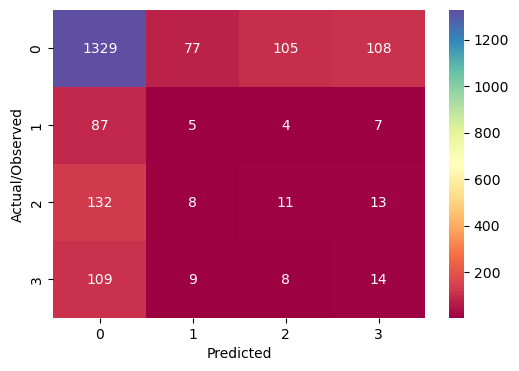

In [12]:
y_predicted = clf_dummy.predict(X_test_scaled_wo_light)
cm = confusion_matrix(y_test_wo_light, y_predicted)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [13]:
print(classification_report(y_test_wo_light, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1619
           1       0.05      0.05      0.05       103
           2       0.09      0.07      0.08       164
           3       0.10      0.10      0.10       140

    accuracy                           0.67      2026
   macro avg       0.26      0.26      0.26      2026
weighted avg       0.66      0.67      0.66      2026



In [14]:
print('Recall: %.3f' % (recall_score(y_test_wo_light, y_predicted, average='weighted')))

Recall: 0.671


In [15]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_predicted)
weighted_precision = precision_score(y_test_wo_light, y_predicted, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_predicted, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_predicted, average='weighted')

# Creating an evaluation metrics dataframe for the model
results = pd.DataFrame([['Naive Baseline Model', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Baseline Model,67.08,65.73,67.08,66.38


### 1. Linear Classifier Model

In [16]:
# Importing the model
linear_classifier_model = pickle.load(open('linear_classification_model.sav', 'rb'))

In [17]:
print("Accuracy on test set: ", linear_classifier_model.score(X_test_scaled_wo_light, y_test_wo_light))

Accuracy on test set:  0.9397828232971372


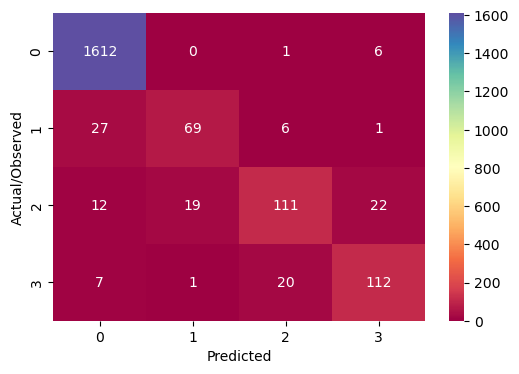

In [18]:
# Confusion Matrix
y_predicted = linear_classifier_model.predict(X_test_scaled_wo_light)
cm = confusion_matrix(y_test_wo_light, y_predicted)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [19]:
# Classification Report
print(classification_report(y_test_wo_light, y_predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1619
           1       0.78      0.67      0.72       103
           2       0.80      0.68      0.74       164
           3       0.79      0.80      0.80       140

    accuracy                           0.94      2026
   macro avg       0.84      0.79      0.81      2026
weighted avg       0.94      0.94      0.94      2026



In [20]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_predicted)
weighted_precision = precision_score(y_test_wo_light, y_predicted, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_predicted, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_predicted, average='weighted')

# Creating an evaluation metrics dataframe for the model
lr_results = pd.DataFrame([['Linear Classifier', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the evaluation metrics into a dataframe
results = results.append(lr_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Baseline Model,67.08,65.73,67.08,66.38
1,Linear Classifier,93.98,93.64,93.98,93.73


### 2. KNN Classifier Model

In [21]:
# Importing the model
knn_classifier_model = pickle.load(open('knn_classification_model.sav', 'rb'))

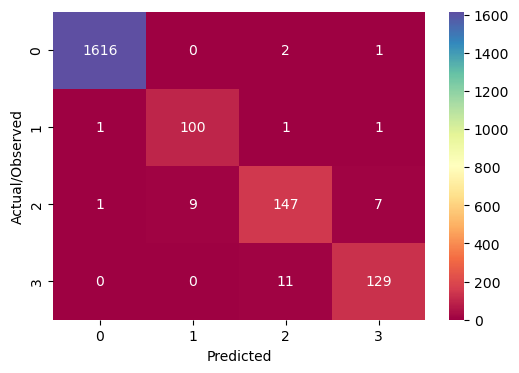

In [22]:
# Confusion Matrix
y_predicted = knn_classifier_model.predict(X_test_scaled_wo_light)
cm = confusion_matrix(y_test_wo_light, y_predicted)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [23]:
# Classification Report
print(classification_report(y_test_wo_light, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.92      0.97      0.94       103
           2       0.91      0.90      0.90       164
           3       0.93      0.92      0.93       140

    accuracy                           0.98      2026
   macro avg       0.94      0.95      0.94      2026
weighted avg       0.98      0.98      0.98      2026



In [24]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_predicted)
weighted_precision = precision_score(y_test_wo_light, y_predicted, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_predicted, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_predicted, average='weighted')

# Creating an evaluation metrics dataframe for the model
lr_results = pd.DataFrame([['KNN Classifier', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the evaluation metrics into a dataframe
results = results.append(lr_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Baseline Model,67.08,65.73,67.08,66.38
1,Linear Classifier,93.98,93.64,93.98,93.73
2,KNN Classifier,98.32,98.33,98.32,98.32


### Decision Tree Classifier Model

In [25]:
# Importing the model
dt_classifier_model = pickle.load(open('dt_classification_model.sav', 'rb'))

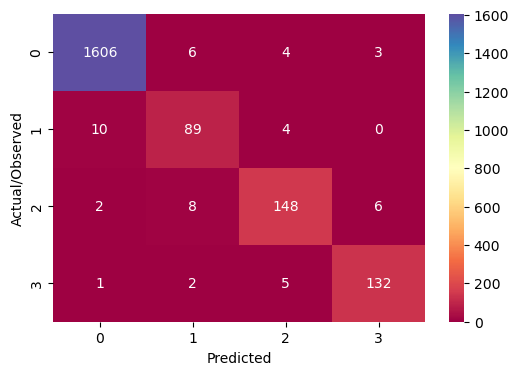

In [26]:
# Confusion Matrix
y_predicted = dt_classifier_model.predict(X_test_wo_light)
cm = confusion_matrix(y_test_wo_light, y_predicted)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [27]:
# Classification Report
print(classification_report(y_test_wo_light, y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1619
           1       0.85      0.86      0.86       103
           2       0.92      0.90      0.91       164
           3       0.94      0.94      0.94       140

    accuracy                           0.97      2026
   macro avg       0.92      0.93      0.92      2026
weighted avg       0.97      0.97      0.97      2026



In [28]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_predicted)
weighted_precision = precision_score(y_test_wo_light, y_predicted, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_predicted, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_predicted, average='weighted')

# Creating an evaluation metrics dataframe for the model
lr_results = pd.DataFrame([['Decision Tree Classifier', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the evaluation metrics into a dataframe
results = results.append(lr_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Baseline Model,67.08,65.73,67.08,66.38
1,Linear Classifier,93.98,93.64,93.98,93.73
2,KNN Classifier,98.32,98.33,98.32,98.32
3,Decision Tree Classifier,97.48,97.49,97.48,97.48


### Random Forest Classifier Model

In [29]:
# Importing the model
rf_classifier_model = pickle.load(open('rf_classification_model.sav', 'rb'))

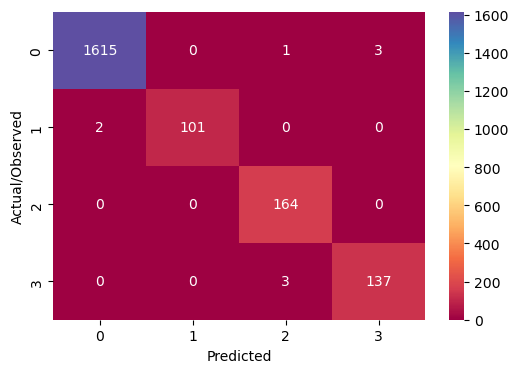

In [30]:
# Confusion Matrix
y_predicted = rf_classifier_model.predict(X_test_wo_light)
cm = confusion_matrix(y_test_wo_light, y_predicted)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [31]:
# Classification Report
print(classification_report(y_test_wo_light, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       1.00      0.98      0.99       103
           2       0.98      1.00      0.99       164
           3       0.98      0.98      0.98       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026



In [32]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_predicted)
weighted_precision = precision_score(y_test_wo_light, y_predicted, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_predicted, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_predicted, average='weighted')

# Creating an evaluation metrics dataframe for the model
lr_results = pd.DataFrame([['Random Forest Classifier', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the evaluation metrics into a dataframe
results = results.append(lr_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Baseline Model,67.08,65.73,67.08,66.38
1,Linear Classifier,93.98,93.64,93.98,93.73
2,KNN Classifier,98.32,98.33,98.32,98.32
3,Decision Tree Classifier,97.48,97.49,97.48,97.48
4,Random Forest Classifier,99.56,99.56,99.56,99.56


### 5. SVM with Linear Kernel

In [33]:
# Importing the model
svm_lk_classifier_model = pickle.load(open('svm_lk_classification_model.sav', 'rb'))

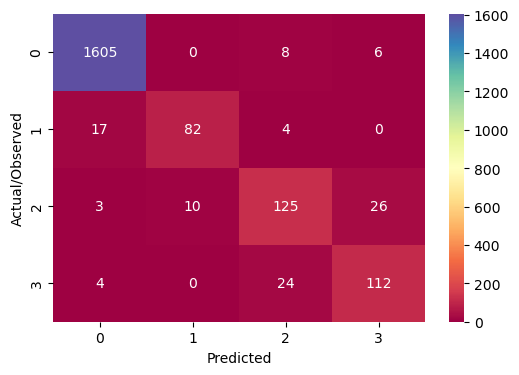

In [34]:
# Confusion Matrix
y_predicted = svm_lk_classifier_model.predict(X_test_scaled_wo_light)
cm = confusion_matrix(y_test_wo_light, y_predicted)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [35]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_predicted)
weighted_precision = precision_score(y_test_wo_light, y_predicted, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_predicted, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_predicted, average='weighted')

# Creating an evaluation metrics dataframe for the model
lr_results = pd.DataFrame([['SVM with Linear Kernel', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the evaluation metrics into a dataframe
results = results.append(lr_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Baseline Model,67.08,65.73,67.08,66.38
1,Linear Classifier,93.98,93.64,93.98,93.73
2,KNN Classifier,98.32,98.33,98.32,98.32
3,Decision Tree Classifier,97.48,97.49,97.48,97.48
4,Random Forest Classifier,99.56,99.56,99.56,99.56
5,SVM with Linear Kernel,94.97,94.92,94.97,94.93


### 6. SVM with Non-Linear Kernel

In [36]:
# Importing the model
svm_nlk_classifier_model = pickle.load(open('svm_nlk_classification_model.sav', 'rb'))

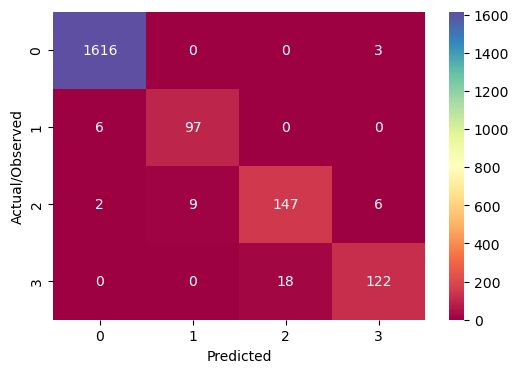

In [37]:
# Confusion Matrix
y_predicted = svm_nlk_classifier_model.predict(X_test_scaled_wo_light)
cm = confusion_matrix(y_test_wo_light, y_predicted)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [38]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_predicted)
weighted_precision = precision_score(y_test_wo_light, y_predicted, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_predicted, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_predicted, average='weighted')

# Creating an evaluation metrics dataframe for the model
lr_results = pd.DataFrame([['SVM with Non-Linear Kernel', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the evaluation metrics into a dataframe
results = results.append(lr_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Baseline Model,67.08,65.73,67.08,66.38
1,Linear Classifier,93.98,93.64,93.98,93.73
2,KNN Classifier,98.32,98.33,98.32,98.32
3,Decision Tree Classifier,97.48,97.49,97.48,97.48
4,Random Forest Classifier,99.56,99.56,99.56,99.56
5,SVM with Linear Kernel,94.97,94.92,94.97,94.93
6,SVM with Non-Linear Kernel,97.83,97.82,97.83,97.81


### 7. Deep Learning Model

In [39]:
# Importing the model
mlp_classifier_model = pickle.load(open('mlp_classification_model.sav', 'rb'))

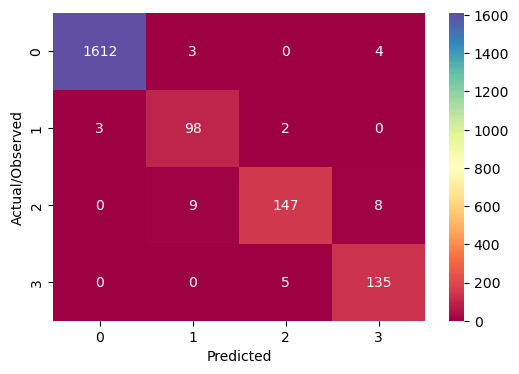

In [40]:
# Confusion Matrix
y_pred_nn = mlp_classifier_model.predict(X_test_scaled_wo_light)
cm = confusion_matrix(y_test_wo_light, y_pred_nn)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [41]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_pred_nn)
weighted_precision = precision_score(y_test_wo_light, y_pred_nn, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_pred_nn, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_pred_nn, average='weighted')

# Creating an evaluation metrics dataframe for the model
lr_results = pd.DataFrame([['Deep Learning Model', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the evaluation metrics into a dataframe
results = results.append(lr_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Baseline Model,67.08,65.73,67.08,66.38
1,Linear Classifier,93.98,93.64,93.98,93.73
2,KNN Classifier,98.32,98.33,98.32,98.32
3,Decision Tree Classifier,97.48,97.49,97.48,97.48
4,Random Forest Classifier,99.56,99.56,99.56,99.56
5,SVM with Linear Kernel,94.97,94.92,94.97,94.93
6,SVM with Non-Linear Kernel,97.83,97.82,97.83,97.81
7,Deep Learning Model,98.32,98.36,98.32,98.33


### 8. Random Forest Model with Variable selction from Correlation Matrix

In [42]:
# Variable Selction
X_train_wo_light_corr_1 = X_train_wo_light.drop(['S3_Temp', 'S4_Temp', 'S5_CO2'], axis=1)
X_test_wo_light_corr_1 = X_test_wo_light.drop(['S3_Temp', 'S4_Temp', 'S5_CO2'], axis=1)

# Scaling
scaler = StandardScaler()
X_train_scaled_wo_light_corr_1 = scaler.fit_transform(X_train_wo_light_corr_1)
X_test_scaled_wo_light_corr_1 = scaler.transform(X_test_wo_light_corr_1)

In [43]:
# Importing the model
rf_classifier_model_with_VS = pickle.load(open('rf_classification_model_with_VS.sav', 'rb'))

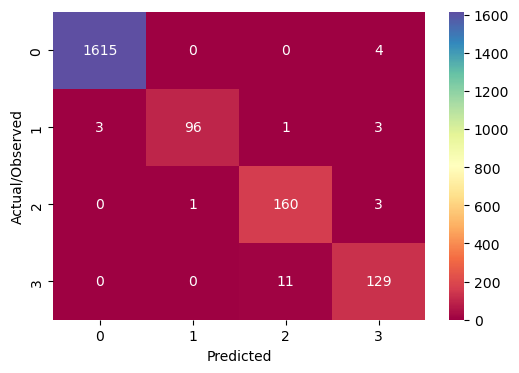

In [44]:
# Confusion Matrix
y_predicted = rf_classifier_model_with_VS.predict(X_test_wo_light_corr_1)
cm = confusion_matrix(y_test_wo_light, y_predicted)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [45]:
# Classification Report
print(classification_report(y_test_wo_light, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      0.93      0.96       103
           2       0.93      0.98      0.95       164
           3       0.93      0.92      0.92       140

    accuracy                           0.99      2026
   macro avg       0.96      0.96      0.96      2026
weighted avg       0.99      0.99      0.99      2026



In [46]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_predicted)
weighted_precision = precision_score(y_test_wo_light, y_predicted, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_predicted, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_predicted, average='weighted')

# Creating an evaluation metrics dataframe for the model
lr_results = pd.DataFrame([['Random Forest Using Correlation Matrix', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the evaluation metrics into a dataframe
results = results.append(lr_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Baseline Model,67.08,65.73,67.08,66.38
1,Linear Classifier,93.98,93.64,93.98,93.73
2,KNN Classifier,98.32,98.33,98.32,98.32
3,Decision Tree Classifier,97.48,97.49,97.48,97.48
4,Random Forest Classifier,99.56,99.56,99.56,99.56
5,SVM with Linear Kernel,94.97,94.92,94.97,94.93
6,SVM with Non-Linear Kernel,97.83,97.82,97.83,97.81
7,Deep Learning Model,98.32,98.36,98.32,98.33
8,Random Forest Using Correlation Matrix,98.72,98.74,98.72,98.72


### 9. Deep Learning Model with Variable Selection from Correlation Matrix

In [47]:
# Importing the model
mlp_classifier_model_with_VS = pickle.load(open('mlp_classification_model_with_VS.sav', 'rb'))

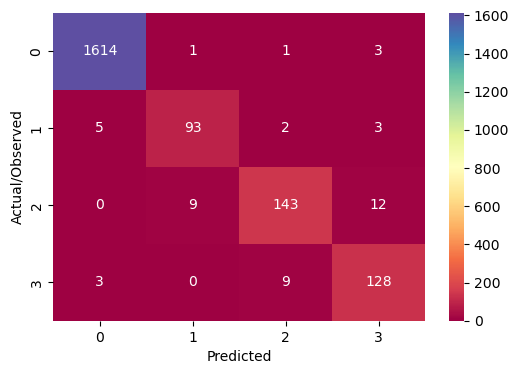

In [48]:
# Confusion Matrix
y_pred_nn_with_VS = mlp_classifier_model_with_VS.predict(X_test_scaled_wo_light_corr_1)
cm = confusion_matrix(y_test_wo_light, y_pred_nn_with_VS)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [49]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_pred_nn_with_VS)
weighted_precision = precision_score(y_test_wo_light, y_pred_nn_with_VS, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_pred_nn_with_VS, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_pred_nn_with_VS, average='weighted')

# Creating an evaluation metrics dataframe for the model
lr_results = pd.DataFrame([['Deep Learning Model using Correlation Matrix', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the evaluation metrics into a dataframe
results = results.append(lr_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Baseline Model,67.08,65.73,67.08,66.38
1,Linear Classifier,93.98,93.64,93.98,93.73
2,KNN Classifier,98.32,98.33,98.32,98.32
3,Decision Tree Classifier,97.48,97.49,97.48,97.48
4,Random Forest Classifier,99.56,99.56,99.56,99.56
5,SVM with Linear Kernel,94.97,94.92,94.97,94.93
6,SVM with Non-Linear Kernel,97.83,97.82,97.83,97.81
7,Deep Learning Model,98.32,98.36,98.32,98.33
8,Random Forest Using Correlation Matrix,98.72,98.74,98.72,98.72
9,Deep Learning Model using Correlation Matrix,97.63,97.63,97.63,97.62


### 10. Random Forest Model with Variable selction using Bidirectional Elimination

In [50]:
# Variable Selction
X_train_wo_light_corr_2 = X_train_wo_light.drop(['S1_Sound', 'S2_Sound', 'S3_Sound'], axis=1)
X_test_wo_light_corr_2 = X_test_wo_light.drop(['S1_Sound', 'S2_Sound', 'S3_Sound'], axis=1)

# Scaling
scaler = StandardScaler()
X_train_scaled_wo_light_corr_2 = scaler.fit_transform(X_train_wo_light_corr_2)
X_test_scaled_wo_light_corr_2 = scaler.transform(X_test_wo_light_corr_2)

In [51]:
# Importing the model
rf_classifier_model_with_BD = pickle.load(open('rf_classification_model_with_BD.sav', 'rb'))

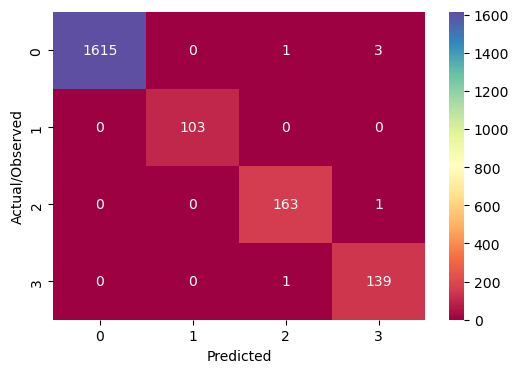

In [52]:
# Confusion Matrix
y_predicted = rf_classifier_model_with_BD.predict(X_test_wo_light_corr_2)
cm = confusion_matrix(y_test_wo_light, y_predicted)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [53]:
# Classification Report
print(classification_report(y_test_wo_light, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       1.00      1.00      1.00       103
           2       0.99      0.99      0.99       164
           3       0.97      0.99      0.98       140

    accuracy                           1.00      2026
   macro avg       0.99      1.00      0.99      2026
weighted avg       1.00      1.00      1.00      2026



In [54]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_predicted)
weighted_precision = precision_score(y_test_wo_light, y_predicted, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_predicted, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_predicted, average='weighted')

# Creating an evaluation metrics dataframe for the model
lr_results = pd.DataFrame([['Random Forest Using Bi-directional Elimination', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the evaluation metrics into a dataframe
results = results.append(lr_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Baseline Model,67.08,65.73,67.08,66.38
1,Linear Classifier,93.98,93.64,93.98,93.73
2,KNN Classifier,98.32,98.33,98.32,98.32
3,Decision Tree Classifier,97.48,97.49,97.48,97.48
4,Random Forest Classifier,99.56,99.56,99.56,99.56
5,SVM with Linear Kernel,94.97,94.92,94.97,94.93
6,SVM with Non-Linear Kernel,97.83,97.82,97.83,97.81
7,Deep Learning Model,98.32,98.36,98.32,98.33
8,Random Forest Using Correlation Matrix,98.72,98.74,98.72,98.72
9,Deep Learning Model using Correlation Matrix,97.63,97.63,97.63,97.62


### 11. Deep Learning Model with Variable Selection using Bi-directional Elimination

In [55]:
# Importing the model
mlp_classifier_model_with_BD = pickle.load(open('mlp_classification_model_with_BD.sav', 'rb'))

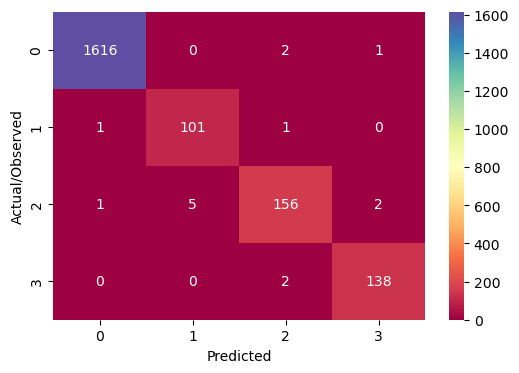

In [56]:
# Confusion Matrix
y_pred_nn_with_BD = mlp_classifier_model_with_BD.predict(X_test_scaled_wo_light_corr_2)
cm = confusion_matrix(y_test_wo_light, y_pred_nn_with_BD)
plt.figure(figsize = (6,4))

sns.heatmap(cm, 
            annot=True, 
            cmap="Spectral",
            fmt='g'
           )
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual/Observed', fontsize=10);

In [57]:
# Calculating the evaluation metrics
accuracy = accuracy_score(y_test_wo_light, y_pred_nn_with_BD)
weighted_precision = precision_score(y_test_wo_light, y_pred_nn_with_BD, average='weighted')
weighted_recall = recall_score(y_test_wo_light, y_pred_nn_with_BD, average='weighted')
weighted_f1 = f1_score(y_test_wo_light, y_pred_nn_with_BD, average='weighted')

# Creating an evaluation metrics dataframe for the model
lr_results = pd.DataFrame([['Deep Learning Model using Bi-directional Elimination', 
                         round(accuracy*100,2), 
                         round(weighted_precision*100,2), 
                         round(weighted_recall*100,2), 
                         round(weighted_f1*100,2)
                        ]],
                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Appending the evaluation metrics into a dataframe
results = results.append(lr_results, ignore_index = True)

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Baseline Model,67.08,65.73,67.08,66.38
1,Linear Classifier,93.98,93.64,93.98,93.73
2,KNN Classifier,98.32,98.33,98.32,98.32
3,Decision Tree Classifier,97.48,97.49,97.48,97.48
4,Random Forest Classifier,99.56,99.56,99.56,99.56
5,SVM with Linear Kernel,94.97,94.92,94.97,94.93
6,SVM with Non-Linear Kernel,97.83,97.82,97.83,97.81
7,Deep Learning Model,98.32,98.36,98.32,98.33
8,Random Forest Using Correlation Matrix,98.72,98.74,98.72,98.72
9,Deep Learning Model using Correlation Matrix,97.63,97.63,97.63,97.62
